In [1]:
import math
import cv2 as cv
from matplotlib import pyplot as plt
plt.set_cmap("gray")


<Figure size 432x288 with 0 Axes>

In [2]:
# load images
img_names = ["objects.jpg", "playing_card_heart_A.png",
             "playing_card_spades_A.png"]
img_objects, img_heart, img_spades = (
    cv.imread(f"./img/{key}") for key in img_names)


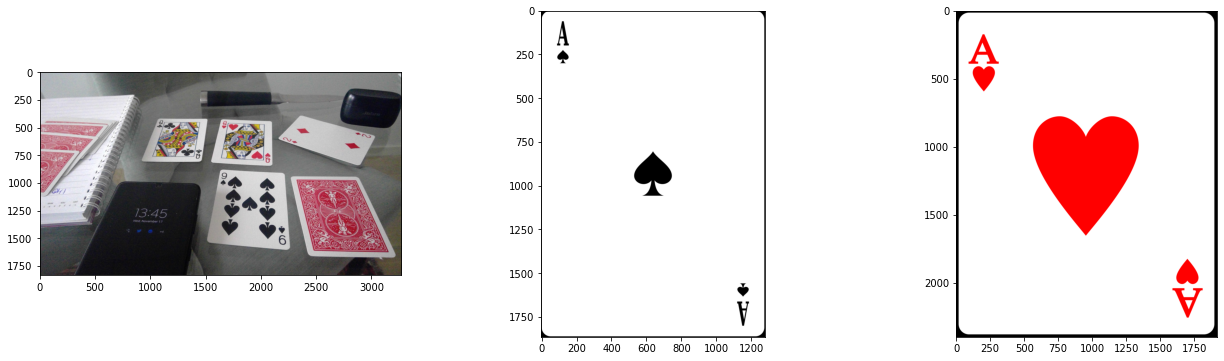

In [3]:
fig, ax = plt.subplots(1, 3)

fig.set_size_inches(22, 6)

ax[0].imshow(img_objects[:, :, ::-1])
ax[1].imshow(img_spades[:, :, ::-1])
ax[2].imshow(img_heart[:, :, ::-1])


16

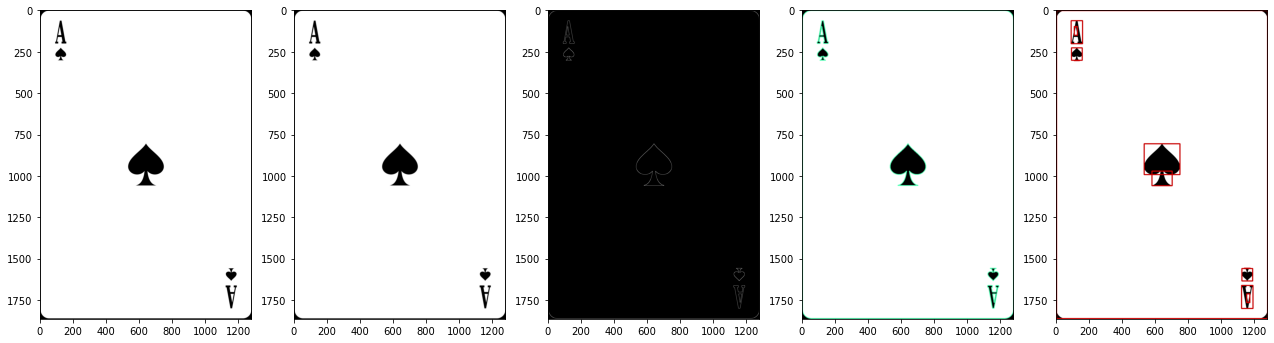

In [4]:
# SPADES
# Work flow one

blur = cv.GaussianBlur(img_spades, (3, 3), 10)
canny = cv.Canny(blur, 100, 200)

contours, hierarchy = cv.findContours(
    canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(img_spades.copy(), contours, -1, (80, 255, 180), 3)

marked = img_spades.copy()
rects = [cv.boundingRect(cnt) for cnt in contours]
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (200, 0, 0), 5)

fig, ax = plt.subplots(1, 5)
fig.set_size_inches(22, 6)

ax[0].imshow(img_spades)
ax[1].imshow(blur)
ax[2].imshow(canny)
ax[3].imshow(b)
ax[4].imshow(marked)

len(contours)


15

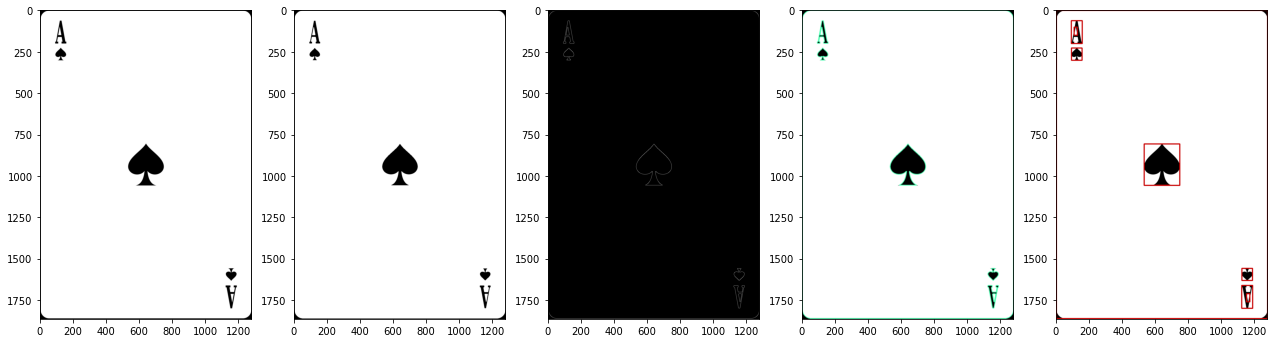

In [5]:
# SPADES
# Work flow two

blur = cv.GaussianBlur(img_spades, (5, 5), 20)
_, bw = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
canny = cv.Canny(bw, 100, 200)

contours, hierarchy = cv.findContours(
    canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(img_spades.copy(), contours, -1, (80, 255, 180), 3)

marked = img_spades.copy()
rects = [cv.boundingRect(cnt) for cnt in contours]
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (200, 0, 0), 5)

fig, ax = plt.subplots(1, 5)
fig.set_size_inches(22, 6)

ax[0].imshow(img_spades)
ax[1].imshow(bw)
ax[2].imshow(canny)
ax[3].imshow(b)
ax[4].imshow(marked)

len(contours)


In [6]:
def get_shapes(image, canny_th1=100, canny_th2=200, blur_ksize=(5, 5), blur_sigmax=20, contours_mode=cv.RETR_CCOMP):
    blur = cv.GaussianBlur(image, blur_ksize, blur_sigmax)
    _, bw = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
    canny = cv.Canny(bw, canny_th1, canny_th2)
    contours, _ = cv.findContours(canny, contours_mode, cv.CHAIN_APPROX_SIMPLE)
    return [cv.boundingRect(cnt) for cnt in contours]


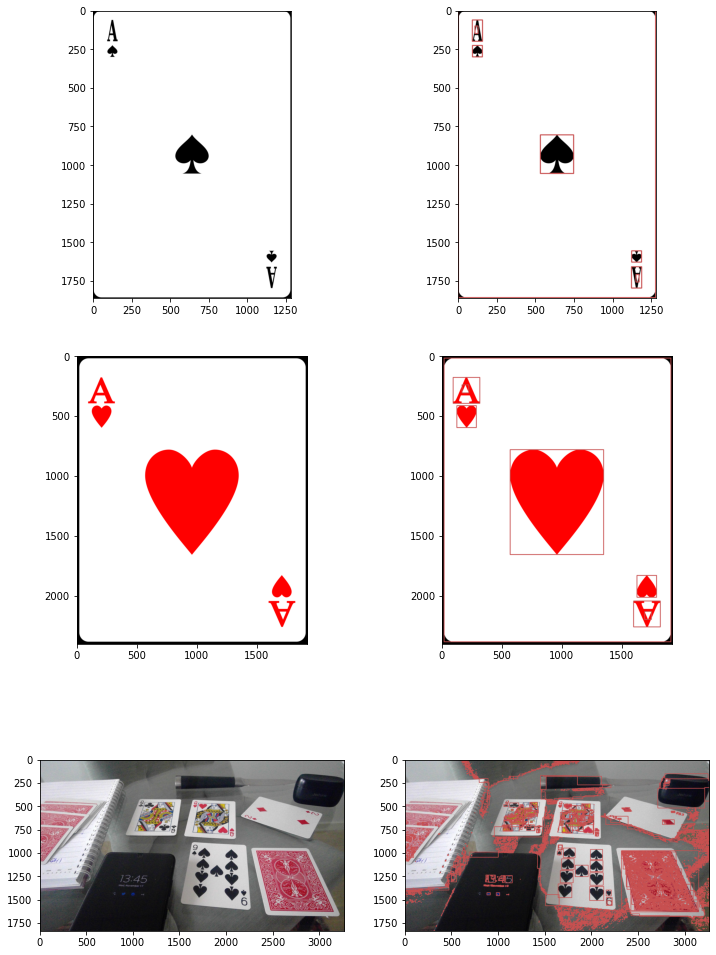

In [7]:

images = [img_spades, img_heart, img_objects]
fig, ax = plt.subplots(len(images), 2)
fig.set_size_inches(12, 6*len(images))
for ix, image in enumerate(images):
    marked = image.copy()
    rects = get_shapes(marked)
    for x, y, w, h in rects:
        cv.rectangle(marked, (x, y), (x+w, y+h), (80, 80, 200), 5)

    ax[ix, 0].imshow(image[:, :, ::-1])
    ax[ix, 1].imshow(marked[:, :, ::-1])


len rects 14432


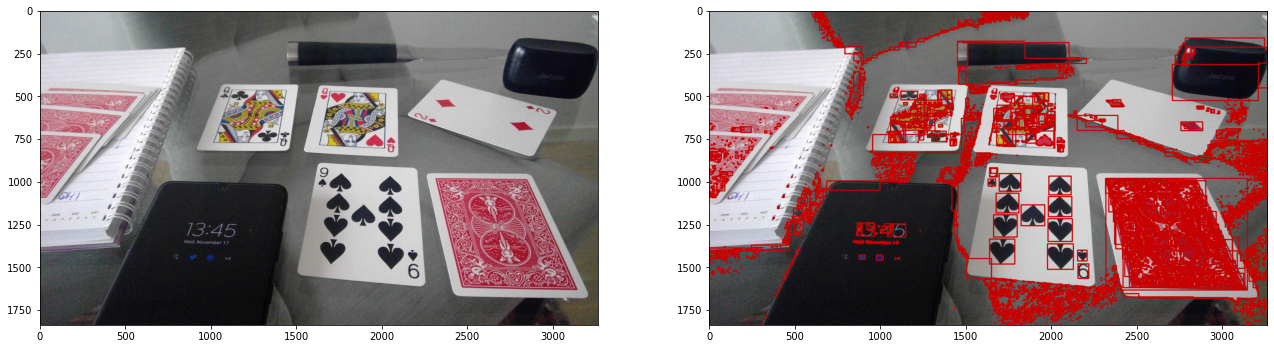

In [8]:
image = img_objects
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(22, 6)
marked = image.copy()
rects = get_shapes(marked, contours_mode=cv.RETR_EXTERNAL)
print(f"len rects {len(rects)}")
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (0, 0, 200), 5)

ax[0].imshow(image[:, :, ::-1])
ax[1].imshow(marked[:, :, ::-1])


len rects 16


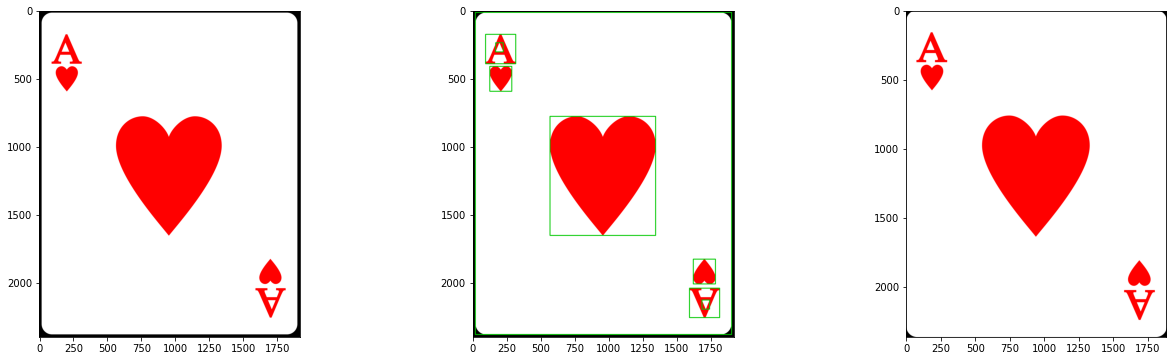

In [9]:
image = img_heart
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(22, 6)
marked = image.copy()
rects = get_shapes(marked)
print(f"len rects {len(rects)}")
objs_in_heart = [image[y:y+h, x:x+w, ::-1] for x, y, w, h in rects]
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (0, 200, 0), 5)
    # image.

ax[0].imshow(image[:, :, ::-1])
ax[1].imshow(marked[:, :, ::-1])

box = rects[15]
x, y, w, h = box
ax[2].imshow(image[y:y+h, x:x+w, ::-1])


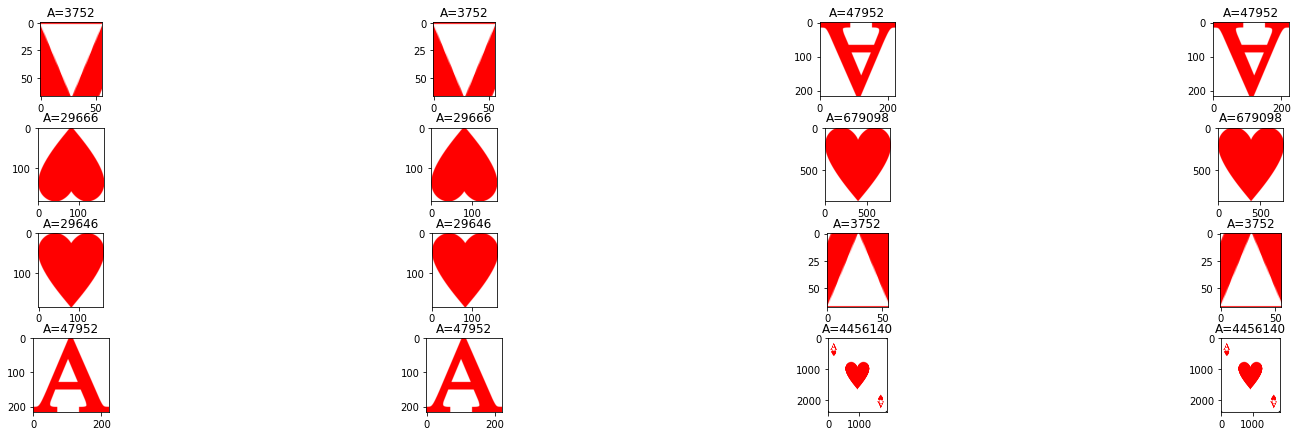

In [10]:
image =  img_heart.copy()

rects = get_shapes(image)
objects = [image[y:y+h, x:x+w, ::-1] for x, y, w, h in rects]

fig, ax = plt.subplots(4, 4)
fig.set_size_inches(22, 6)
fig.tight_layout()

for ix, img in enumerate(objects):
    ax[ix//4, ix % 4].imshow(img)
    ax[ix//4, ix % 4].set_title(f"A={img.shape[0] * img.shape[1]}")



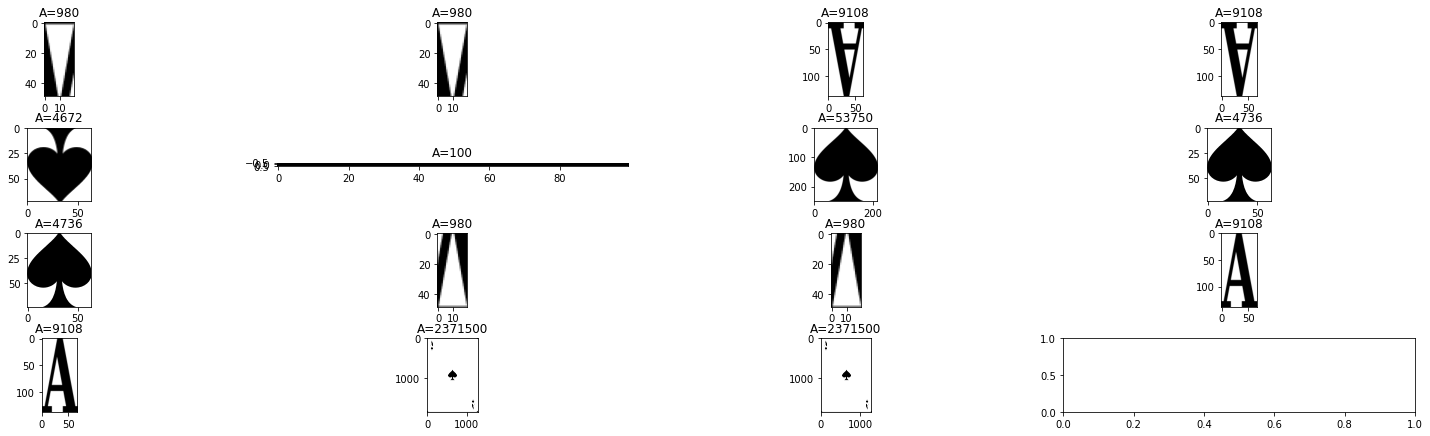

In [11]:
image =  img_spades.copy()
rects = get_shapes(image)
objects = [image[y:y+h, x:x+w, ::-1] for x, y, w, h in rects]

fig, ax = plt.subplots(4, 4)
fig.set_size_inches(22, 6)
fig.tight_layout()

for ix, img in enumerate(objects):
    ax[ix//4, ix % 4].imshow(img)
    ax[ix//4, ix % 4].set_title(f"A={img.shape[0] * img.shape[1]}")


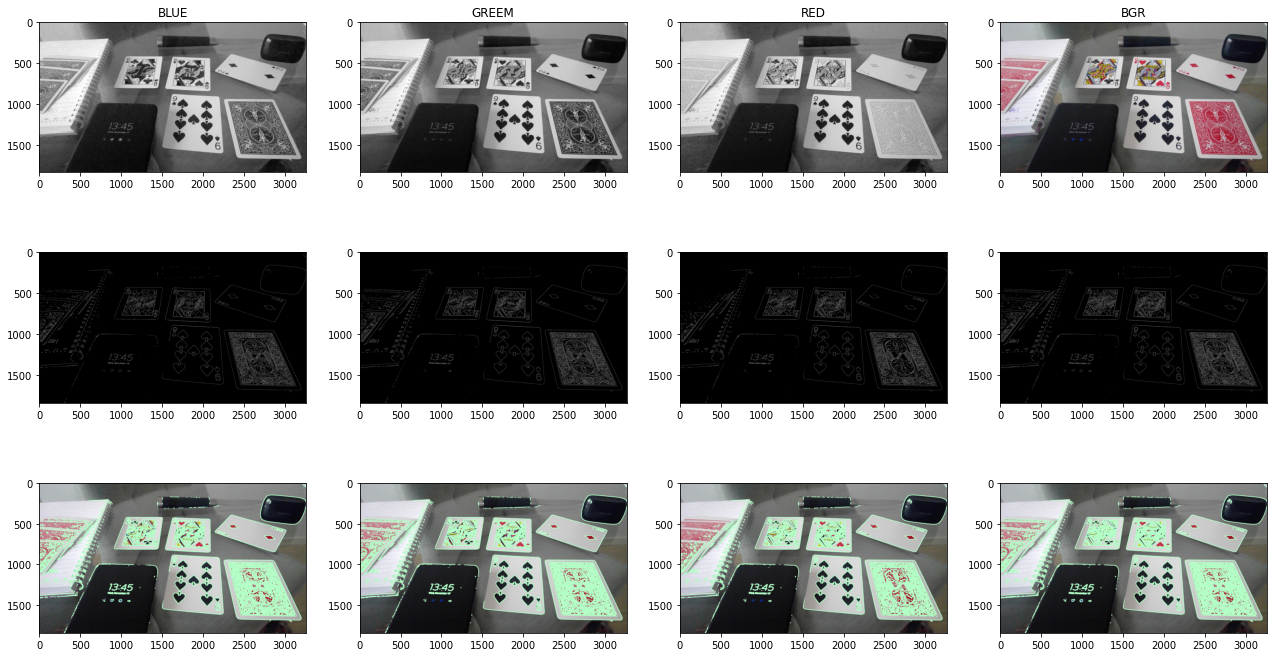

In [12]:
# trying diffrent method for better detection

# BGR
image = img_objects
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(22, 12)

image = cv.GaussianBlur(image, (5, 5), 10)

ax[0, 0].imshow(image[:, :, 0])
ax[0, 0].set_title("BLUE")
ax[0, 1].imshow(image[:, :, 1])
ax[0, 1].set_title("GREEM")
ax[0, 2].imshow(image[:, :, 2])
ax[0, 2].set_title("RED")
ax[0, 3].imshow(image[:, :, ::-1])
ax[0, 3].set_title("BGR")

cannies = []
for i in range(3):
    canny = cv.Canny(image[:, :, i], 90, 100)
    ax[1, i].imshow(canny)

    contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    b = cv.drawContours(image.copy(), contours, -1, (200, 255, 180), 7)
    ax[2, i].imshow(b[:, :, ::-1])
    # print(len(b))

canny = cv.Canny(image, 90, 100)
ax[1, 3].imshow(canny)

contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(image.copy(), contours, -1, (200, 255, 180), 7)
ax[2, 3].imshow(b[:, :, ::-1])
# print(len(b))


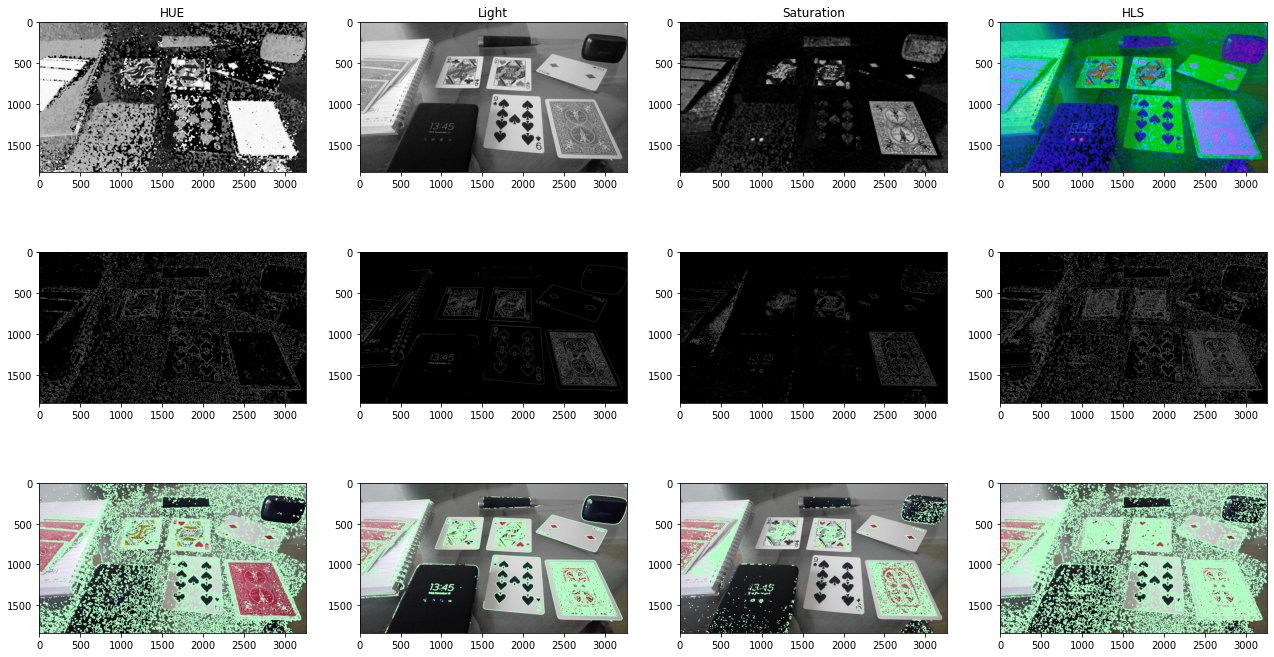

In [13]:
# HLS
org_img = img_objects
image = cv.cvtColor(org_img, cv.COLOR_BGR2HLS_FULL)
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(22, 12)

image = cv.GaussianBlur(image, (5, 5), 10)

ax[0, 0].imshow(image[:, :, 0])
ax[0, 0].set_title("HUE")
ax[0, 1].imshow(image[:, :, 1])
ax[0, 1].set_title("Light")
ax[0, 2].imshow(image[:, :, 2])
ax[0, 2].set_title("Saturation")
ax[0, 3].imshow(image[:, :, ::-1])
ax[0, 3].set_title("HLS")

cannies = []
for i in range(3):
    canny = cv.Canny(image[:, :, i], 90, 100)
    ax[1, i].imshow(canny)

    contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    b = cv.drawContours(org_img.copy(), contours, -1, (200, 255, 180), 7)
    ax[2, i].imshow(b[:, :, ::-1])
    # print(len(b))

canny = cv.Canny(image, 90, 100)
ax[1, 3].imshow(canny)

contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(org_img.copy(), contours, -1, (200, 255, 180), 7)
ax[2, 3].imshow(b[:, :, ::-1])
# print(len(b))


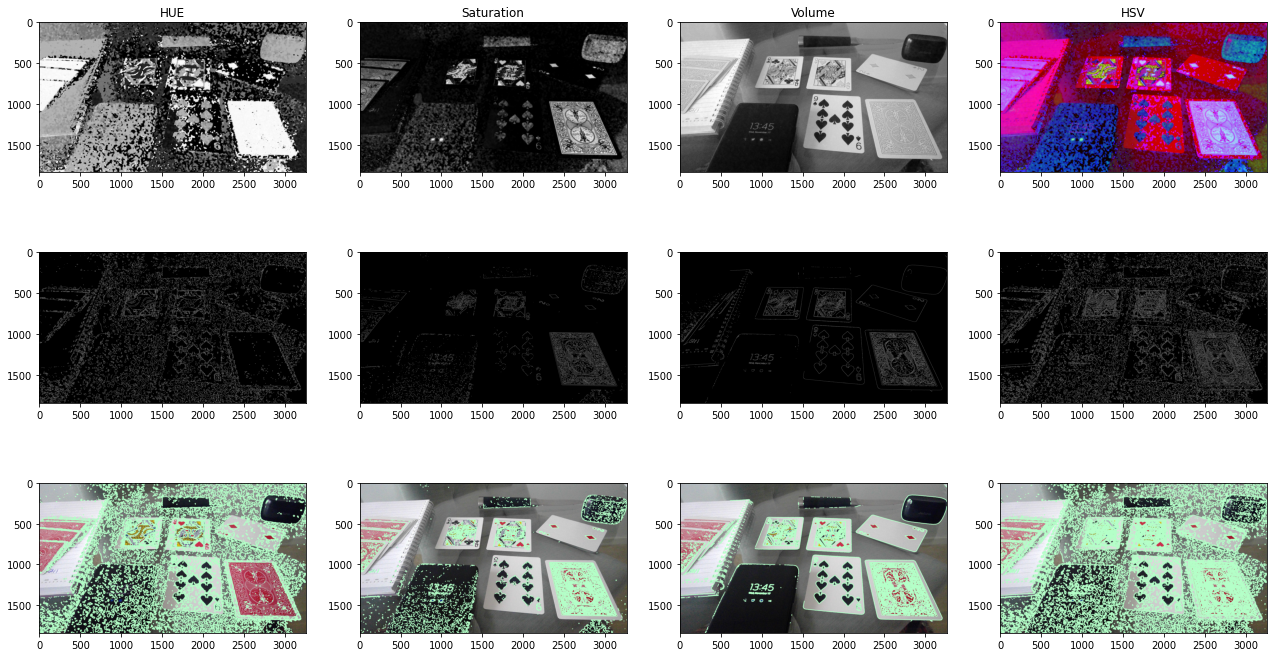

In [14]:
# HSV
org_img = img_objects
image = cv.cvtColor(org_img, cv.COLOR_BGR2HSV_FULL)
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(22, 12)

image = cv.GaussianBlur(image, (5, 5), 10)

ax[0, 0].imshow(image[:, :, 0])
ax[0, 0].set_title("HUE")
ax[0, 1].imshow(image[:, :, 1])
ax[0, 1].set_title("Saturation")
ax[0, 2].imshow(image[:, :, 2])
ax[0, 2].set_title("Volume")
ax[0, 3].imshow(image[:, :, ::-1])
ax[0, 3].set_title("HSV")

cannies = []
for i in range(3):
    canny = cv.Canny(image[:, :, i], 90, 100)
    ax[1, i].imshow(canny)

    contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    b = cv.drawContours(org_img.copy(), contours, -1, (200, 255, 180), 7)
    ax[2, i].imshow(b[:, :, ::-1])
    # print(len(b))

canny = cv.Canny(image, 90, 100)
ax[1, 3].imshow(canny)

contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(org_img.copy(), contours, -1, (200, 255, 180), 7)
ax[2, 3].imshow(b[:, :, ::-1])
# print(len(b))
